In [52]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2
from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D
from keras.layers import BatchNormalization, Activation, MaxPooling2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.utils import plot_model, to_categorical

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import urllib
import csv





IMG_HEIGHT=48
IMG_WIDTH=48


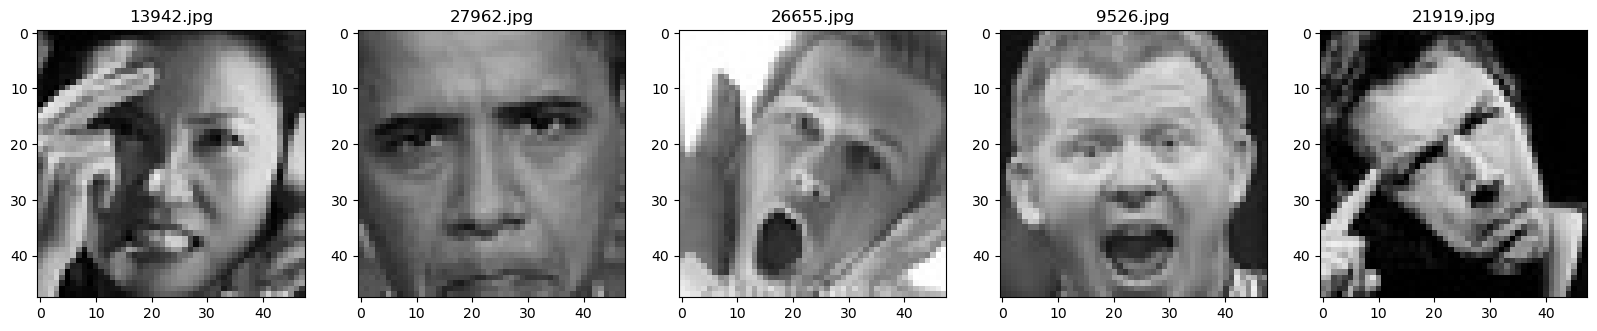

In [43]:
import random


plt.figure(figsize=(20,20))

hap_folder=r'E:\Face Base\Angry'
for i in range(5):
    file = random.choice(os.listdir(hap_folder))
    image_path= os.path.join(hap_folder, file)
    img=mpimg.imread(image_path)
    
    ax=plt.subplot(1,5,i+1)
    ax.set_title(file)
    plt.imshow(img)
    
    

In [44]:
def create_dataset(img_folder):
    image_array=[]
    name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):

            image_path= os.path.join(img_folder, dir1, file)
            image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            image= cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image= image.astype('float32')
            image /= 255
            image_array.append(image)
            name.append(dir1)
            
    return (image_array, name)


(img_array, name) = create_dataset(r'E:\Face Base')


In [45]:
folder=r'E:\Face Base'


dictionary={k: v for v, k in enumerate(np.unique(name))}
dictionary 
{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Sad': 4, 'Surprised': 5, 'Neutral': 6}

target_value= [dictionary[name[i]] for i in range (len(name))]



In [59]:
model= Sequential()
#First convolution layer:
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#second
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#third
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#fourth
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#flattening
model.add(Flatten())

#coonnected first layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#connected second layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt=Adam(lr= 0.0005)
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()
#pooling layer for cnn


train_set=img_array

train_value=target_value


train_value = to_categorical(train_value, 7)


reduce_lr= ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience= 2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', 
    save_weights_only=True, mode='max', verbose=1)
#training the model
history = model.fit(
    x=np.array(train_set, np.float32), 
    y=np.array(train_value, np.float32), batch_size=64,  epochs=15, shuffle=True 
    #validation_data=(np.array(test_set, np.float32), (np.array(test_value, np.float32)))
)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization_72 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_72 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_73 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_87 (Conv2D)          (None, 24, 24, 128)     

c:\Users\arwen\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
469/469 [==============================] - 275s 584ms/step - loss: 1.7589 - accuracy: 0.3246
Epoch 2/15
469/469 [==============================] - 274s 585ms/step - loss: 1.4480 - accuracy: 0.4479
Epoch 3/15
469/469 [==============================] - 275s 586ms/step - loss: 1.3112 - accuracy: 0.4984
Epoch 4/15
469/469 [==============================] - 275s 586ms/step - loss: 1.2262 - accuracy: 0.5326
Epoch 5/15
469/469 [==============================] - 274s 585ms/step - loss: 1.1665 - accuracy: 0.5543
Epoch 6/15
469/469 [==============================] - 274s 584ms/step - loss: 1.1128 - accuracy: 0.5762
Epoch 7/15
469/469 [==============================] - 274s 584ms/step - loss: 1.0710 - accuracy: 0.5928
Epoch 8/15
469/469 [==============================] - 274s 583ms/step - loss: 1.0217 - accuracy: 0.6134
Epoch 9/15
469/469 [==============================] - 274s 584ms/step - loss: 0.9764 - accuracy: 0.6295
Epoch 10/15
469/469 [==============================] - 274s 583m

1/1 [==============================] - 0s 29ms/step
Neutral


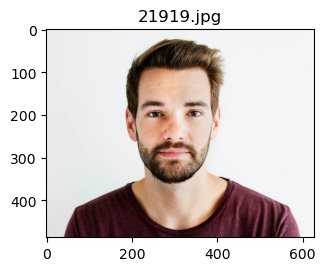

In [65]:
plt.figure(figsize=(20,20))

image_path=r'C:\Users\arwen\OneDrive\Desktop\portrait-white-man-isolated_53876-40306.webp'
image=mpimg.imread(image_path)
ax=plt.subplot(1,5,2)
ax.set_title(file)
plt.imshow(image)

image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
image= cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
images_arr = []
images_arr.append(np.array(image))
img = np.asarray(images_arr)


img= img.astype('float32')
img /= 255

def find_emotion(prediction):
    emotion_list = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprised', 'Neutral']
    highest_val=prediction.argmax()
    emotion=emotion_list[highest_val]
    return emotion


prediction=model.predict(img)
print(find_emotion(prediction))

#right now doesnt print values correctly

